In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Salary_cleaned.csv")

In [52]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,...,HeadQuarter_in_jobState,age,python,r_sto,spark,aws,sql,oracle,JobSimp,seniority
0,Data Scientist,"['53', '91']","Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,47,1,0,0,0,0,0,Data Scientist,na
1,Healthcare Data Scientist,"['63', '112']",What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,36,1,0,0,0,0,0,Data Scientist,na
2,Data Scientist,"['80', '90']","KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,10,1,0,1,0,1,0,Data Scientist,na
3,Data Scientist,"['56', '97']",*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,1,0,0,0,0,0,Data Scientist,na
4,Data Scientist,"['86', '143']",Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,0,1,0,Data Scientist,na


In [32]:
def title_change(title):
    if "data scientist"   in title.lower():
        return "Data Scientist"
    elif "data engineer" in title.lower():
        return "Data Engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "ml"
    elif "director" in title.lower():
        return "director"
    elif "manager" in title.lower():
        return "manager"
    else:
        return 'na'
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or"lead" in title.lower() or"principal" in title.lower():
        return "senior"
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [33]:
df['JobSimp']=df['Job_Title'].apply(title_change)

In [34]:
df.JobSimp.value_counts()


Data Scientist    279
na                184
Data Engineer     119
analyst           102
manager            22
ml                 22
director           14
Name: JobSimp, dtype: int64

In [38]:
df['seniority']=df['Job_Title'].apply(seniority)

In [40]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [51]:
df.State.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
IN     10
WI     10
MO      9
AZ      9
AL      8
MI      6
GA      6
DE      6
KY      6
IA      5
CT      5
LA      4
NE      4
OR      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: State, dtype: int64

In [50]:
df['State'] = df['State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [54]:
df['JobDescrip_len']=df.Job_Description.apply(lambda x: len(x))
df.JobDescrip_len

0      2536
1      4783
2      3461
3      3883
4      2728
5      3747
6      1786
7      3804
8      1538
9      4574
10     2757
11     3490
12     3934
13     4897
14     3731
15     1889
16     3639
17     4163
18     3512
19     4397
20     2918
21     6909
22     6408
23     2907
24     3760
25     3698
26     4420
27     4900
28     5015
29     3461
       ... 
712    3725
713    3776
714    2306
715    7121
716    3911
717    2867
718    2311
719    6175
720    3783
721    2479
722    5338
723    3243
724    1848
725    7361
726    3374
727    3693
728    4613
729    4707
730    3309
731    2752
732    3478
733    5717
734    5016
735    3813
736    5025
737    6162
738    6130
739    3078
740    1642
741    3673
Name: JobDescrip_len, Length: 742, dtype: int64

In [58]:
df.columns


Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min_salary', 'Max_salary', 'avg_salary', 'Company_Title', 'State',
       'HeadQuarter_in_jobState', 'age', 'python', 'r_sto', 'spark', 'aws',
       'sql', 'oracle', 'JobSimp', 'seniority', 'JobDescrip_len'],
      dtype='object')

In [59]:
df.Min_salary[df.Min_salary <20]

165    17
197    18
210    15
240    15
246    17
337    18
409    10
492    18
618    10
666    18
Name: Min_salary, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x204804cc358>],
 'caps': [<matplotlib.lines.Line2D at 0x204804ccd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x204804dea20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x204804de5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x204804cc4a8>,
  <matplotlib.lines.Line2D at 0x204804cc940>]}

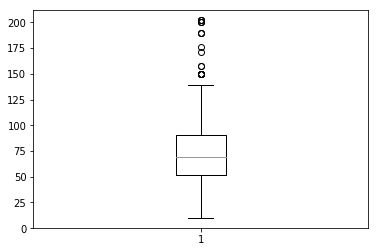

In [66]:
import matplotlib.pyplot as plt
plt.boxplot(df['Min_salary'])


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 30 columns):
Job_Title                  742 non-null object
Salary_Estimate            742 non-null object
Job_Description            742 non-null object
Rating                     742 non-null float64
Company_Name               742 non-null object
Location                   742 non-null object
Headquarters               742 non-null object
Size                       742 non-null object
Founded                    742 non-null int64
Type_of_ownership          742 non-null object
Industry                   742 non-null object
Sector                     742 non-null object
Revenue                    742 non-null object
Competitors                742 non-null object
Min_salary                 742 non-null int64
Max_salary                 742 non-null int64
avg_salary                 742 non-null float64
Company_Title              742 non-null object
State                      742 non-null object
Hea

In [69]:
df.describe()


,Rating,Founded,Min_salary,Max_salary,avg_salary,HeadQuarter_in_jobState,age,python,r_sto,spark,aws,sql,oracle,JobDescrip_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.512129,0.053908,3869.545822
std,0.801210,497.183763,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.500190,0.225989,1521.495868
min,-1.000000,-1.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000
50%,3.700000,1988.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3731.000000
75%,4.000000,2007.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4740.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000


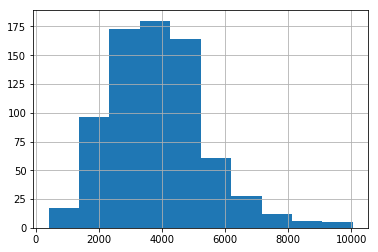

In [77]:
df.JobDescrip_len.hist()

In [99]:
import seaborn as sns 
import numpy as np
corr=df[['age','Rating','JobDescrip_len','avg_salary']].corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

In [ ]:
cmap= sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)


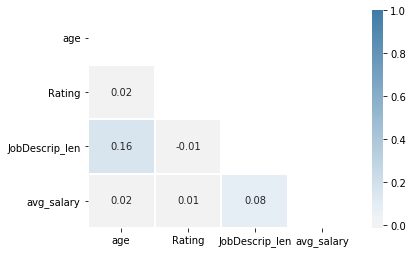

In [101]:
sns.heatmap(df[['age','Rating','JobDescrip_len','avg_salary']].corr(),mask=mask,center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f')

In [102]:
cols=df.columns
num_cols=df._get_numeric_data().columns

In [110]:
list(set(cols)-set(num_cols))

['seniority',
 'Company_Name',
 'JobSimp',
 'Industry',
 'Location',
 'Size',
 'Type_of_ownership',
 'State',
 'Job_Title',
 'Salary_Estimate',
 'Sector',
 'Competitors',
 'Headquarters',
 'Job_Description',
 'Company_Title',
 'Revenue']

In [107]:
df.Size.head()

0     501 to 1000 employees
1          10000+ employees
2     501 to 1000 employees
3    1001 to 5000 employees
4       51 to 200 employees
Name: Size, dtype: object

In [ ]:
import seaborn as sns 
chart=sns.barplot(x=df.State.value_counts()[:25].index,y=df.State.value_counts()[:25])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
import pandas as pd
pd.pivot_table(df,index=['State','JobSimp'],values='avg_salary').sort_values('avg_salary',ascending= False)


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize